# Maize Yield Analysis

In [19]:
# the libraries required for the script
import os
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import rioxarray
import matplotlib.patches as mpatches

##### Set the working directory


In [21]:
os.chdir('D:/LabTogo/TechnicalAssessment/')
# Create the products directory if it doesn't exist
os.makedirs('products', exist_ok=True)

## Task 1: Data Cleaning and Exploration

### Task 1.1: Import and merge administrative boundary files for Togo and Benin

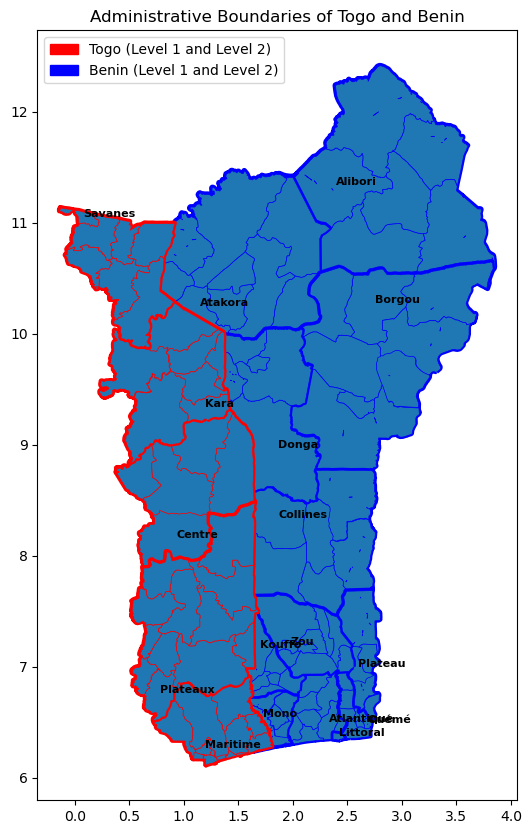

In [22]:
# import the GeoJSON files for Togo and Benin at level 2
togo = gpd.read_file('data/administrative_boundaries/gadm41_TGO_2.geojson')
benin = gpd.read_file('data/administrative_boundaries/gadm41_BEN_2.geojson')

# Merge the two geoJson files
boundaries = pd.concat([togo, benin])

# Plot administrative polygons with different colors for each country
fig, ax = plt.subplots(figsize=(10, 10))
for country, data in boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    for level_1, group_1 in data.groupby('NAME_1'):
        group_1.plot(ax=ax, edgecolor=color, linewidth=3.5)
        for level_2, group_2 in group_1.groupby('NAME_2'):
            group_2.plot(ax=ax, edgecolor=color, linewidth=0.5)

# Add labels for regions
labeled_regions = set()
for idx, row in boundaries.iterrows():
    if row['NAME_1'] not in labeled_regions:
        color = 'black' if row['COUNTRY'] == 'Togo' else 'black'
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['NAME_1'], fontsize=8, color=color, weight='bold')
        labeled_regions.add(row['NAME_1'])
        
plt.title('Administrative Boundaries of Togo and Benin')
red_patch = mpatches.Patch(color='red', label='Togo (Level 1 and Level 2)')
blue_patch = mpatches.Patch(color='blue', label='Benin (Level 1 and Level 2)')
plt.legend(handles=[red_patch, blue_patch], loc='upper left')
plt.savefig('products/1.1.jpeg')
plt.show()

- This map shows the level 1 and 2 administrative boundaries of Togo and Benin. The borders of Togo are shown in red, while those of Benin are shown in blue, clearly identifying the administrative divisions of the two countries.

- The boundaries of  level 1 are represented by thicker lines, while the boundaries of the level 2 are drawn with thinner lines. This differentiation facilitates the hierarchization of administrative divisions and makes both levels visible.

- As far as level 1 are concerned, Benin has much larger regions in the north and smaller ones in the south, while Togo's regions are relatively uniform in size.

### Task 1.2: Import and explore maize yield data
#### Load maize yield data

In [26]:
yield_data = pd.read_csv('data/administrative_yield/fews_net_yield_TGO_BEN.csv')

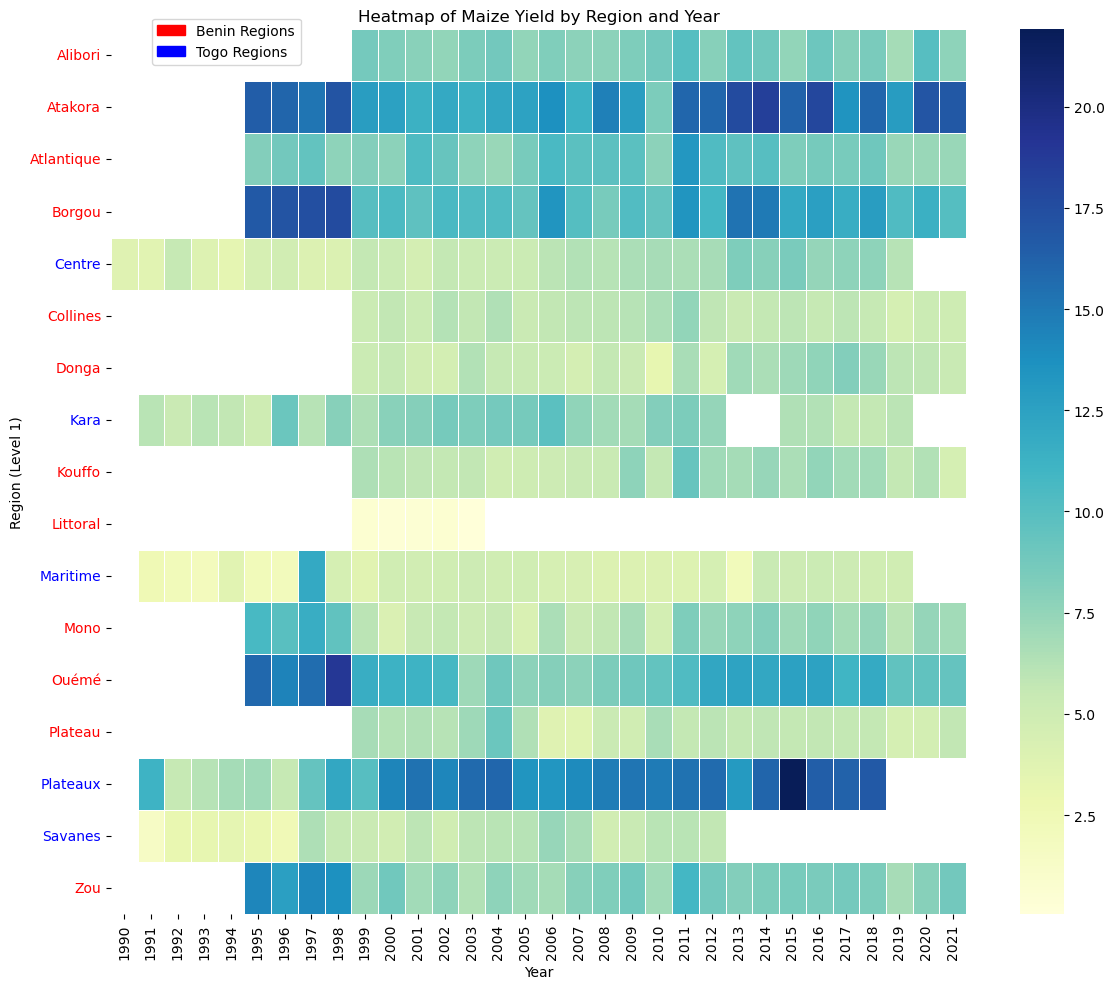

In [24]:
# Create a pivot table for the heatmap
yield_pivot = yield_data.pivot_table(index='admin_1', columns='year', values='value',aggfunc='sum')

# Plot heatmap of maize yield by region and year
plt.figure(figsize=(12, 10))
plt.title('Heatmap of Maize Yield by Region and Year')
ax = sns.heatmap(yield_pivot, cmap='YlGnBu', annot=False, linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Region (Level 1)')

# Customize region label colors based on country
for text in ax.get_yticklabels():
    region_name = text.get_text()
    country = yield_data[yield_data['admin_1'] == region_name]['country'].iloc[0]
    text.set_color('red' if country == 'Benin' else 'blue')

red_patch = mpatches.Patch(color='red', label='Benin Regions')
blue_patch = mpatches.Patch(color='blue', label='Togo Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.02))
plt.tight_layout()
plt.savefig('products/1.2.png')
plt.show()



- This heat map illustrates maize yields in different regions of Benin and Togo between 1990 and 2021. Color intensity represents yield values, with darker shades corresponding to higher yields. Benin regions are marked in red, while Togo regions are marked in blue.
- White cells appear on the heatmap, indicating missing values.  An imputation method could be considered to fill in missing data and provide a more coherent analysis.
- The Borgou, Atakora and Plateaux regions show higher total production over time than the others, represented by darker colors. This may suggest a strong contribution from these regions to overall maize production. The years 1996-1997 seem to have been marked by relatively high production in several regions of Benin, such as Borgou and Ouémé.
- Other regions, such as Collines, Littoral, and Kouffo, have lower production over the years, which may indicate specific challenges or agricultural constraints limiting their productivity.
- Benin regions generally show greater variation in maize yields over time than Togo, particularly in northern regions such as Alibori, Borgou and Atacora.
- Togo regions, such as Plateaux and Savanes, show more consistent yield values, with fewer fluctuations over the years. Plateaux region shows significantly high production levels in 1995 and 2006-2011
- Some regions have missing data or gaps like the littoral and savanes region, which may indicate either the absence of yield data for those years, or problems with data collection.

- Yields tend to fluctuate over the years, which may indicate variable agricultural conditions, climatic factors or changes in farming practices.
- Overall, the heat map suggests differences in agricultural productivity between the two countries, and highlights regions where yields are either consistently high or variable. Regions in Benin appear to show greater variability in yields over time, whereas in Togo, yields are more uniform. 



Overall, Benin seems to have higher production than Togo.






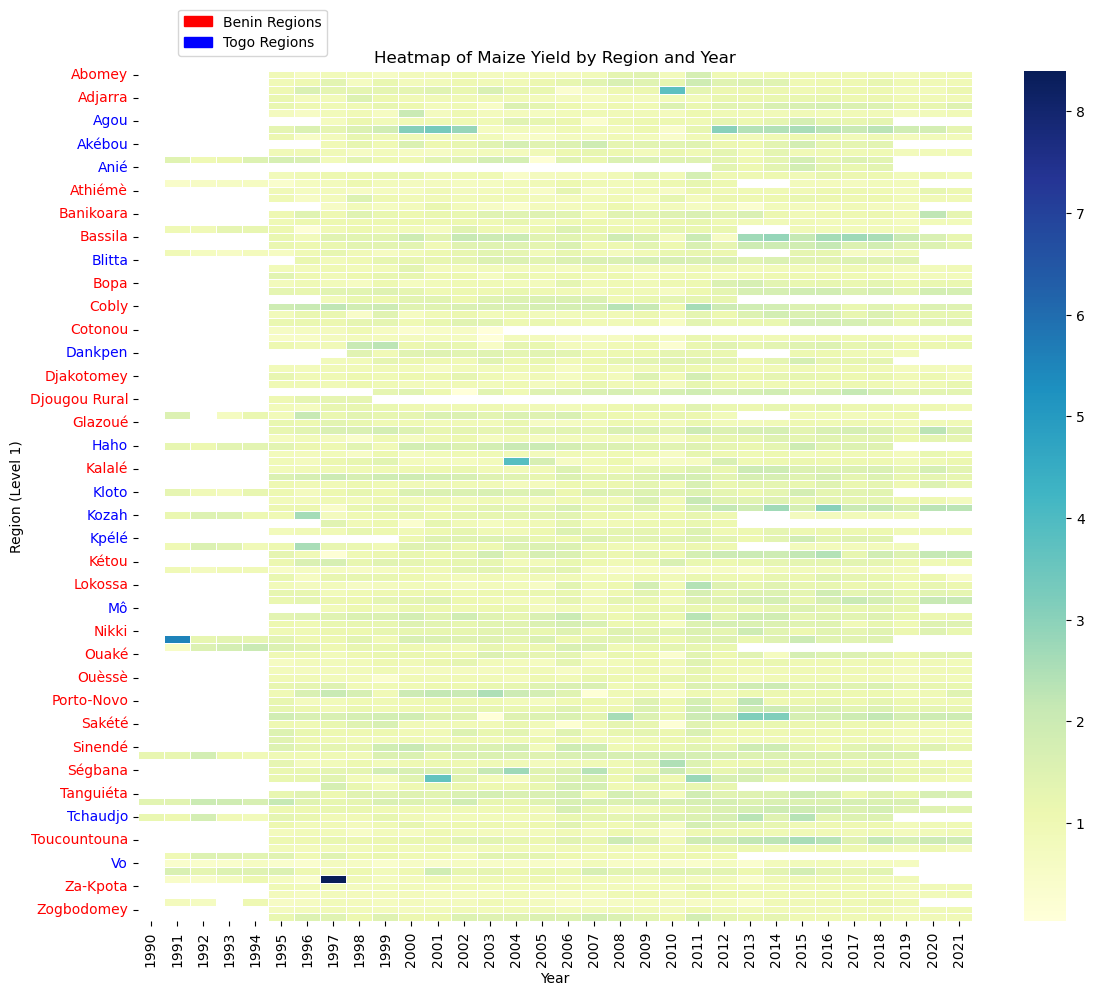

In [34]:
# Create a pivot table for the heatmap
yield_pivot = yield_data.pivot_table(index='admin_2', columns='year', values='value')

# Plot heatmap of maize yield by region and year
plt.figure(figsize=(12, 10))
plt.title('Heatmap of Maize Yield by Region and Year')
ax = sns.heatmap(yield_pivot, cmap='YlGnBu', annot=False, linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Region (Level 1)')

# Customize region label colors based on country
for text in ax.get_yticklabels():
    region_name = text.get_text()
    country = yield_data[yield_data['admin_2'] == region_name]['country'].iloc[0]
    text.set_color('red' if country == 'Benin' else 'blue')

red_patch = mpatches.Patch(color='red', label='Benin Regions')
blue_patch = mpatches.Patch(color='blue', label='Togo Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.08))
plt.tight_layout()
plt.savefig('products/1.2a.png')
plt.show()

### Task 1.3 Visit the FAO GIEWS website for Togo. What is the typical timeline for maize production in 
Togo?

The typical timeline for maize production in Togo varies by region due to climatic differences between the northern and southern parts of the country.
According to the FAO GIEWS website,In southern Togo,  which benefits from two rainy seasons (bimodal rainfall pattern), there are generally two maize cultivation cycles per year:

- First season:
  - Planting: March to April
  - Growing: May to July
  - Harvesting: August to September
- Second season:
    - Planting: August to September
    - Growing : October to November
    - Harvesting: December to january
 

In northern Togo, where there is a single rainy season (unimodal rainfall), maize is cultivated once a year. The rainy season is between May and September

### Task 1.4: Import MODIS VI data

In [70]:
vi_data = xr.open_dataset('data/modis_vegetation_indices/modis_vi.nc', engine='netcdf4')

# Apply scale factor to NDVI and EVI values
scale_factor = 0.0001
vi_data['NDVI'] = vi_data['NDVI'] * scale_factor * scale_factor
vi_data['EVI'] = vi_data['EVI'] * scale_factor * scale_factor

# Mask fill values for NDVI and EVI
fill_value = -3000 * scale_factor
vi_data['NDVI'] = vi_data['NDVI'].where(vi_data['NDVI'] != fill_value)
vi_data['EVI'] = vi_data['EVI'].where(vi_data['EVI'] != fill_value)

In [72]:
vi_data = xr.open_dataset('data/modis_vegetation_indices/modis_vi.nc', engine='netcdf4')
print(vi_data['NDVI'].attrs)


{'add_offset_err': 0, 'calibrated_nt': 5, 'long_name': 'CMG 0.05 Deg Monthly NDVI', 'scale_factor_err': 0, 'units': 'NDVI', 'valid_range': '-2000, 10000', 'grid_mapping': 'spatial_ref'}


- valid_range: -2000, 10000: This means that the NDVI values in the NetCDF file are within this range before scaling.


In [77]:
vi_data = xr.open_dataset('data/modis_vegetation_indices/modis_vi.nc', engine='netcdf4')
print(vi_data['NDVI'].min().values, vi_data['NDVI'].max().values)
print(vi_data['EVI'].min().values, vi_data['EVI'].max().values)

-19820000.0 97840000.0
-14870000.0 85330000.0


- The data shows that the actual values range between [-19,820,000.0, 97,840,000.0] for NDVI and [-14,870,000.0, 85,330,000.0] for EVI. I will apply a scale factor of 1e-8 and mask values below 0.2 to focus solely on vegetated areas since we are working on agricultural yield.]


In [78]:

# Apply scale factor 
scale_factor = 1e-8
vi_data['NDVI'] = vi_data['NDVI'] * scale_factor
vi_data['EVI'] = vi_data['EVI'] * scale_factor

# Mask negative values
vi_data['NDVI'] = vi_data['NDVI'].where(vi_data['NDVI'] >= 0)
vi_data['EVI'] = vi_data['EVI'].where(vi_data['EVI'] >= 0)

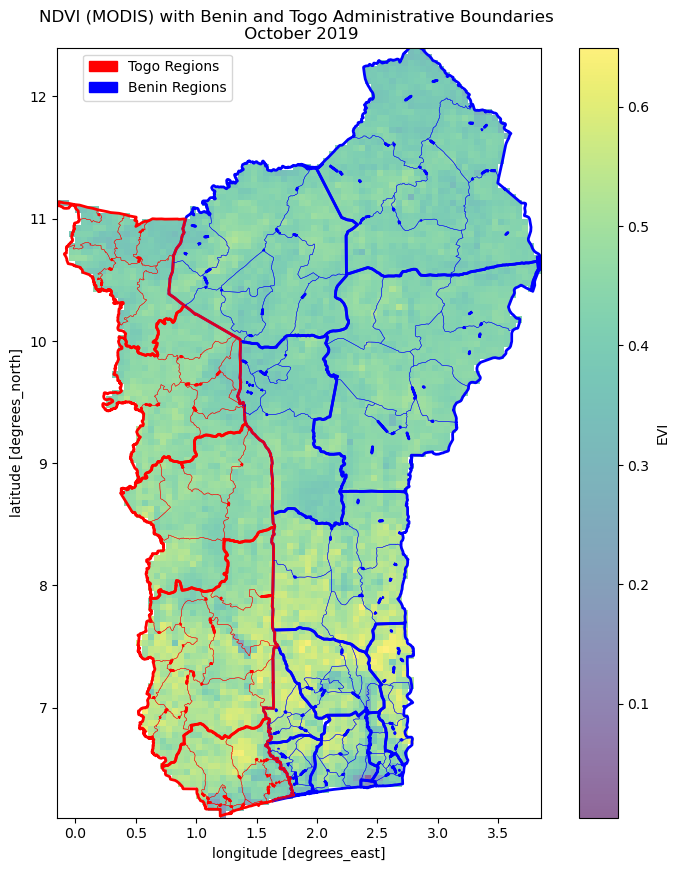

In [90]:
# Extract NDVI data for october 2019
ndvi = vi_data['EVI'].sel(time='2019-10')

#Ensure CRS consistency between NDVI and boundaries
ndvi = ndvi.rio.write_crs(boundaries.crs, inplace=True)

# Clip NDVI to the boundaries of Togo and Benin
ndvi_clipped = ndvi.rio.clip(boundaries.geometry, drop=True)

# Plot NDVI with level 1 and level 2 boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped NDVI data
ndvi_clipped.plot(ax=ax, cmap='viridis', alpha=0.6)

# Plot level 1 boundaries
level_1_boundaries = boundaries.dissolve(by='NAME_1')
for country, data in level_1_boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    data.boundary.plot(ax=ax, edgecolor=color, linewidth=2)

# Plot level 2 boundaries
level_2_boundaries = boundaries.dissolve(by='NAME_2')
for country, data in level_2_boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    data.boundary.plot(ax=ax, edgecolor=color, linewidth=0.3)

plt.title('NDVI (MODIS) with Benin and Togo Administrative Boundaries \n October 2019')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Togo Regions')
blue_patch = mpatches.Patch(color='blue', label='Benin Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.0))
plt.savefig('products/1.4.png')
plt.show()

- Administrative boundaries, particularly at level 2, are much more detailed than vegetation data.
Different administrative regions are often smallerThis complicates the task of accurately capturing vegetation variations within each administrative region. Smaller regions, in particular, may be covered by only a few pixels, or even just one, limiting the detail of information we can extract.

- Vegetation variations within these smaller regions(level2) may not be fully captured, which can affect the accuracy of the information extracted for detailed analysis at local level.

- MODIS VI data, with a spatial resolution of around 5.6 km, are suitable for analyzing large vegetation patterns at the level of larger regions, such as countries or large administrative areas.

- For larger regions (such as level 1), vegetation data could provide more reliable information, as they smooth out local variations. This means that an approach based on aggregated analyses at the level of large regions could be more suitable for linking NDVI/EVI data to maize yields.

- the south seems much more vegetated


# Task 2: Geospatial Data Wrangling

## 2.1 Extract vegetation features from the VI data.

In [92]:
# Ensure CRS consistency between VI data and boundaries
vi_data = vi_data.rio.write_crs(boundaries.crs, inplace=True)

# Initialize a list to store extracted features
features = []

# Extract mean, min, and max values for each level polygon
for month in pd.date_range(start='2002-01', end='2024-07', freq='M'):
    for vi in ['NDVI', 'EVI']:
        # Attempt to match the time in the dataset using method='pad'
        try:
            vi_month = vi_data[vi].sel(time=month, method='pad')
        except KeyError:
            continue  # If the month is not found, skip

        vi_clipped = vi_month.rio.clip(boundaries.geometry, drop=True)
        
        for idx, row in boundaries.iterrows():
            # Mask the polygon
            masked = vi_clipped.rio.clip([row.geometry], drop=True)
            mean_val = masked.mean().values.item() if masked.size > 0 else np.nan
            min_val = masked.min().values.item() if masked.size > 0 else np.nan
            max_val = masked.max().values.item() if masked.size > 0 else np.nan
            
            features.append({
                'year': month.year,
                'month': month.month,
                'country': row['COUNTRY'],
                'name_1': row['NAME_1'],
                'name_2': row['NAME_2'],
                'vi': vi,
                'mean': mean_val,
                'min': min_val,
                'max': max_val
            })

# Convertion to DataFrame
features_df = pd.DataFrame(features)
features_df.to_csv('products/2.1_data.csv', index=False)


In [93]:
features_df

,year,month,country,name_1,name_2,vi,mean,min,max
0,2002,7,Togo,Centre,Blitta,NDVI,0.744607,0.6564,0.8341
1,2002,7,Togo,Centre,Mô,NDVI,0.759922,0.7016,0.8259
2,2002,7,Togo,Centre,Sotouboua,NDVI,0.723608,0.6231,0.8154
3,2002,7,Togo,Centre,Tchamba,NDVI,0.731899,0.6247,0.7943
4,2002,7,Togo,Centre,Tchaudjo,NDVI,0.720066,0.5833,0.7863
...,...,...,...,...,...,...,...,...,...
62299,2024,6,Benin,Zou,Djidja,EVI,0.466551,0.3798,0.5362
62300,2024,6,Benin,Zou,Ouinhi,EVI,0.480658,0.4514,0.5194
62301,2024,6,Benin,Zou,Za-Kpota,EVI,0.455743,0.3759,0.5018
62302,2024,6,Benin,Zou,Zagnanado,EVI,0.513294,0.3968,0.5859


C:\Users\YOuedraogo\AppData\Local\Temp\ipykernel_44468\1708092790.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


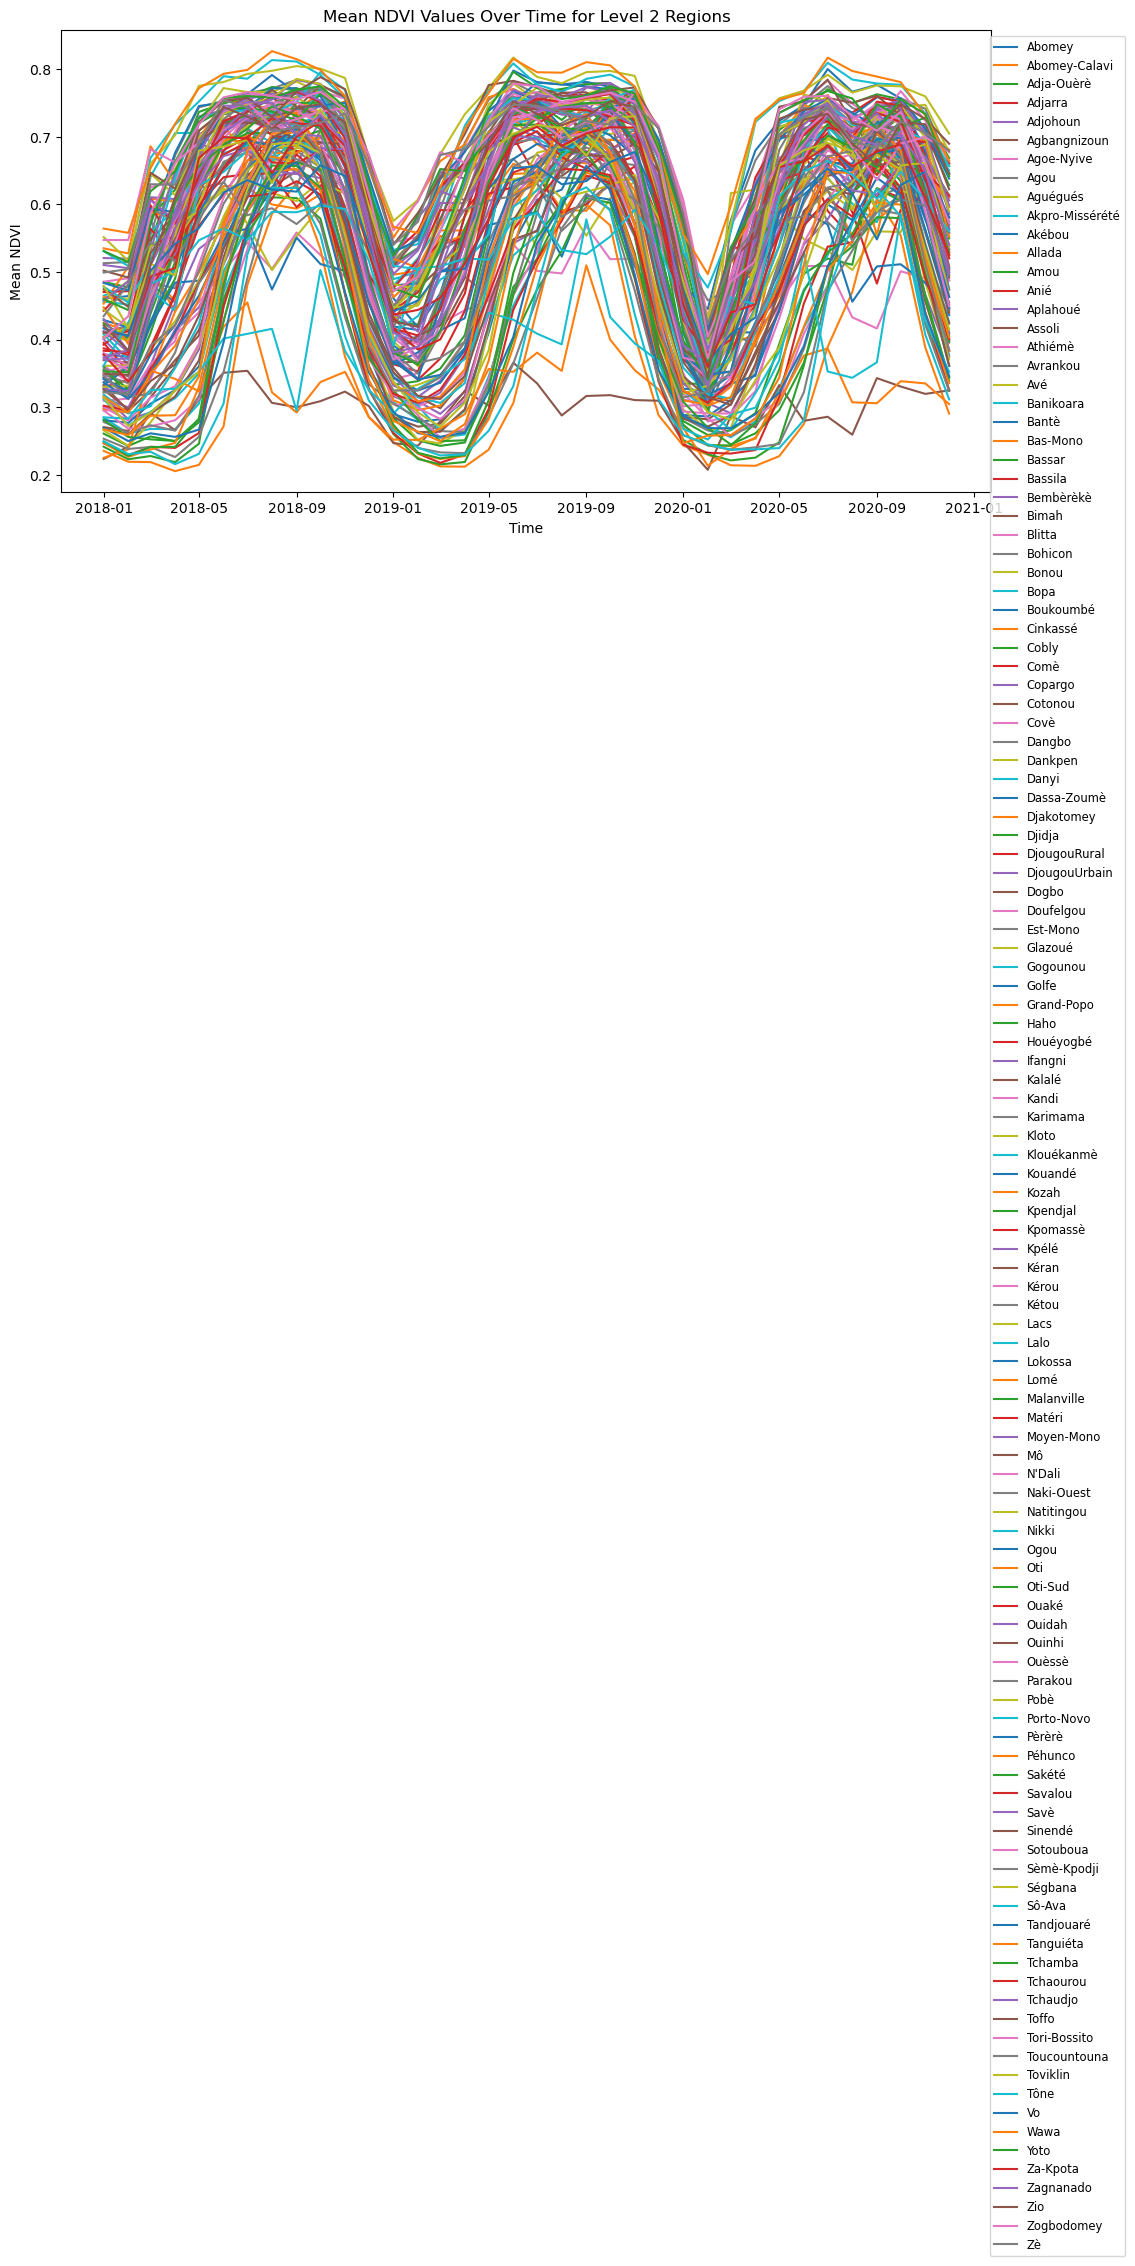

In [95]:

# Create a visualization: Mean NDVI values over months for each level 2 region for selected years
selected_years = [2018, 2019,2020]
mean_ndvi_df = features_df[(features_df['vi'] == 'NDVI') & (features_df['year'].isin(selected_years))].groupby(['year', 'month', 'name_2'])['mean'].mean().reset_index()



# Plotting mean NDVI values
fig, ax = plt.subplots(figsize=(12, 6))
for name_2, group in mean_ndvi_df.groupby('name_2'):
    ax.plot(pd.to_datetime(group[['year', 'month']].assign(day=1)), group['mean'], label=name_2)

plt.title('Mean NDVI Values Over Time for Level 2 Regions')
plt.xlabel('Time')
plt.ylabel('Mean NDVI')
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.savefig('products/2.1.png')
plt.show()

- The graph above shows average normalized vegetation index (NDVI) values over time for different level 2 administrative regions in Benin and Togo, over a period from January 2018 to January 2020.
- The graph above shows average normalized vegetation index (NDVI) values over time for different level 2 administrative regions in Benin and Togo, over a period from January 2018 to January 2020.
- Similarly, the significant drops in NDVI values, generally observed around the months of November to February, suggest dry periods. This corresponds well with the dry seasons in this region of West Africa.
- NDVI values generally peak around June-July, corresponding to the growing season for crops such as maize. This peak is followed by a gradual decline, suggesting the end of the growing season and harvesting.


## 2.2 Reshape the extracted data into a wide format such that there is a single row for each unique combination of country, administrative level 1, administrative level 2, and year.

In [96]:
# Reshape the extracted data into wide format
wide_df = features_df.pivot_table(index=['country', 'name_1', 'name_2', 'year'],
                                  columns=['vi', 'month'],
                                  values=['mean', 'min', 'max'])
wide_df.columns = [f'{vi}_{stat}_{month:02d}' for stat, vi, month in wide_df.columns]
wide_df.reset_index(inplace=True)
wide_df.to_csv('products/features_data2.csv', index=False)


In [97]:
wide_df

,country,name_1,name_2,year,EVI_max_01,EVI_max_02,EVI_max_03,EVI_max_04,EVI_max_05,EVI_max_06,...,NDVI_min_03,NDVI_min_04,NDVI_min_05,NDVI_min_06,NDVI_min_07,NDVI_min_08,NDVI_min_09,NDVI_min_10,NDVI_min_11,NDVI_min_12
0,Benin,Alibori,Banikoara,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.3668,0.5818,0.6626,0.5758,0.3799,0.3005
1,Benin,Alibori,Banikoara,2003,0.1977,0.1892,0.1802,0.2624,0.3254,0.4521,...,0.2224,0.2473,0.2559,0.3729,0.5283,0.6533,0.6490,0.5264,0.3896,0.2682
2,Benin,Alibori,Banikoara,2004,0.1950,0.1762,0.1731,0.2502,0.3164,0.4008,...,0.2120,0.2195,0.2602,0.3647,0.4283,0.5687,0.6629,0.5458,0.3602,0.2450
3,Benin,Alibori,Banikoara,2005,0.1855,0.1675,0.1737,0.2224,0.3294,0.4199,...,0.1862,0.2281,0.2584,0.3001,0.4407,0.4269,0.6391,0.5849,0.3689,0.2715
4,Benin,Alibori,Banikoara,2006,0.1912,0.1817,0.1877,0.2152,0.2462,0.3732,...,0.2253,0.2207,0.2436,0.2554,0.3020,0.5536,0.6576,0.6271,0.4379,0.2989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,Togo,Savanes,Tône,2020,0.1804,0.1720,0.1819,0.2086,0.2066,0.2409,...,0.2129,0.2048,0.2051,0.2238,0.2908,0.4899,0.5460,0.5443,0.3798,0.2869
2710,Togo,Savanes,Tône,2021,0.1898,0.1824,0.1700,0.1702,0.2050,0.2241,...,0.2135,0.2116,0.2152,0.2258,0.2673,0.5492,0.5888,0.5250,0.3718,0.2860
2711,Togo,Savanes,Tône,2022,0.1822,0.1756,0.1629,0.1913,0.2619,0.3037,...,0.2033,0.2103,0.2216,0.2688,0.2858,0.4705,0.5491,0.5400,0.3588,0.2845
2712,Togo,Savanes,Tône,2023,0.1867,0.1754,0.1780,0.1722,0.1919,0.2482,...,0.2220,0.2082,0.2150,0.2531,0.2930,0.5593,0.5831,0.5144,0.3730,0.2836


- The broad format makes it possible to prepare data for predictive models that require observations in the form of feature vectors, where each row of data is an observation with all the relevant features, facilitating the training of regression models.
- By matching each line with a unique combination of country, region and year, it is simpler to merge this data with other sources, such as agricultural yields(Togo and Benin), which are often aggregated at this same level (i.e. by year and region).
- structuring data in a broad format is important for linking vegetation indices to specific periods in the maize production cycle.
- This makes it possible, for example, to examine NDVI values during growth periods (sowing and flowering) and relate them to crop yields. By having the vegetation indices for each month, it becomes possible to understand the impact of climatic conditions on maize yield for each growing season.

# 2.3 Merge the vegetation features with the maize yield data.

In [98]:
# Merge the vegetation features with the maize yield data

yield_data.rename(columns={'admin_1': 'name_1', 'admin_2': 'name_2'}, inplace=True)
merg_df = pd.merge(wide_df, yield_data, on=['country', 'name_1', 'name_2', 'year'], how='inner')


In [101]:
merg_df.to_csv('products/2.3_Data.csv', index=False)

In [103]:
merg_df = pd.read_csv('products/2.3_Data.csv')
merg_df

,country,name_1,name_2,year,EVI_max_01,EVI_max_02,EVI_max_03,EVI_max_04,EVI_max_05,EVI_max_06,...,NDVI_min_08,NDVI_min_09,NDVI_min_10,NDVI_min_11,NDVI_min_12,season_name,season_type,value,unit,product
0,Benin,Alibori,Banikoara,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5818,0.6626,0.5758,0.3799,0.3005,Main,Harvest,1.194343,MT/ha,Maize (Corn)
1,Benin,Alibori,Banikoara,2003,0.1977,0.1892,0.1802,0.2624,0.3254,0.4521,...,0.6533,0.6490,0.5264,0.3896,0.2682,Main,Harvest,1.468042,MT/ha,Maize (Corn)
2,Benin,Alibori,Banikoara,2004,0.1950,0.1762,0.1731,0.2502,0.3164,0.4008,...,0.5687,0.6629,0.5458,0.3602,0.2450,Main,Harvest,1.454900,MT/ha,Maize (Corn)
3,Benin,Alibori,Banikoara,2005,0.1855,0.1675,0.1737,0.2224,0.3294,0.4199,...,0.4269,0.6391,0.5849,0.3689,0.2715,Main,Harvest,1.501367,MT/ha,Maize (Corn)
4,Benin,Alibori,Banikoara,2006,0.1912,0.1817,0.1877,0.2152,0.2462,0.3732,...,0.5536,0.6576,0.6271,0.4379,0.2989,Main,Harvest,1.375722,MT/ha,Maize (Corn)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Togo,Savanes,Tône,2008,0.1625,0.1564,0.1544,0.1636,0.2406,0.3246,...,0.5621,0.5661,0.5118,0.3544,0.2773,Main,Harvest,0.920000,MT/ha,Maize (Corn)
1993,Togo,Savanes,Tône,2009,0.1718,0.1655,0.1604,0.1738,0.2248,0.3619,...,0.4678,0.5638,0.5325,0.3970,0.2843,Main,Harvest,0.950000,MT/ha,Maize (Corn)
1994,Togo,Savanes,Tône,2010,0.1737,0.1641,0.1542,0.1543,0.1828,0.2784,...,0.4975,0.5635,0.5523,0.4251,0.2854,Main,Harvest,1.080000,MT/ha,Maize (Corn)
1995,Togo,Savanes,Tône,2011,0.1722,0.1691,0.1677,0.1682,0.1825,0.2321,...,0.4688,0.5534,0.5297,0.3655,0.2739,Main,Harvest,1.050000,MT/ha,Maize (Corn)


L'utilisation d'un inner join permet de garantir que les données fusionnées sont cohérentes et ne contiennent que des observations pour lesquelles les deux jeux de données (caractéristiques de la végétation et rendement du maïs) sont disponibles. Cela peut être particulièrement utile pour éviter des biais qui pourraient être introduits par des valeurs manquantes.

# Task 3: Linear Modeling and Results Interpretation

### 3.1 Compare the distribution of yields to a log transformation of yields. Which values will you use in your model and why?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


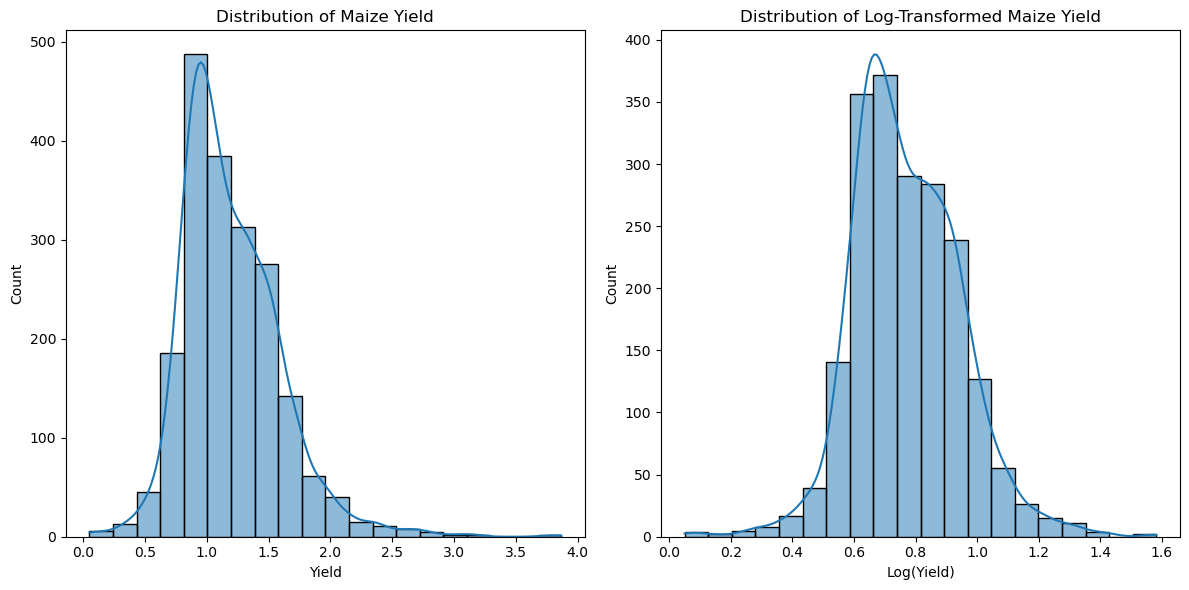

In [104]:
# Task 3.1: Compare the distribution of yields to a log transformation of yields
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merg_df['value'], bins=20, kde=True)
plt.title('Distribution of Maize Yield')
plt.xlabel('Yield')

plt.subplot(1, 2, 2)
log_yield = np.log1p(merg_df['value'])
sns.histplot(log_yield, bins=20, kde=True)
plt.title('Distribution of Log-Transformed Maize Yield')
plt.xlabel('Log(Yield)')

plt.tight_layout()
plt.savefig('products/3.1.png')
plt.show()

#### Interpretation of which values to use in the model
- Comparing the two graphs, we can see that the distribution of maize yields without transformation (left) is asymmetrical with a bias to the right, indicating that most values are concentrated around the low yields and that some higher values extend to the right.
- After applying a logarithmic transformation (right graph), the distribution becomes more symmetrical and more closely approximates a normal distribution. In addition, logarithmic transformation can reduce the effect of outliers and stabilize variance, which is beneficial for the performance of predictive models.
- For the model, we will use log-transformed yield values, as this results in a closer-to-normal distribution

# Task 3.2: One-hot encode the location (admin 2) and split the data



In [105]:
X = merg_df.drop(columns=['value', 'unit', 'product', 'season_name', 'season_type'])
y = np.log1p(merg_df['value'])  # Using log-transformed yields

# One-hot encode the 'name_2' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(X[['name_2']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['name_2']))

# Add encoded features back to the features
X = X.drop(columns=['country', 'name_1', 'name_2']).reset_index(drop=True)
X = pd.concat([X, encoded_features_df], axis=1)

# Remove rows with missing values in X or y
X = X.dropna()
y = y[X.index]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train/validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Ridge regression with cross-validation
alphas = np.logspace(-5, 5, 50)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridge_cv.fit(X_train, y_train)

# Calculate and report validation set and test set performance scores
train_r2 = ridge_cv.score(X_train, y_train)
test_r2 = ridge_cv.score(X_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [106]:
print(f'Training R^2 score: {train_r2:.4f}')
print(f'Test R^2 score: {test_r2:.4f}')

Training R^2 score: 0.5003
Test R^2 score: 0.4208


- The Training R² Score measures the model's ability to explain the variance of the data it has been trained on, while the Test R2 assesses the model's ability to generalize and predict new, never-before-seen data. This is a much more reliable indicator of the model's actual performance in practical situations.
- A score of 0.50 means that the model explains around 50% of the variance in the training set data. This indicates a moderate ability of the model to capture the underlying relationships in the training data.
- A score of 0.42 on the test set means that the model explains around 42% of the variance of the data on data that had never been used by the model. The slight difference shows that the model generalizes reasonably well to new data.
- The scores obtained suggest that the model has an acceptable performance, with a reasonable ability to generalize to new data. The slight decrease in the R² score on the test set compared to the training set was expected and indicates that the model does not overlearn.

# Task 3.3: Aggregate data to level 1 and rerun model


In [117]:

# Take the mean of the yield and vegetation features to summarize data at level 1 (name_1)
numeric_columns = merg_df.select_dtypes(include=[np.number]).columns.difference(['year'])
level1_df = merg_df.drop(columns=['country', 'name_2']).groupby(['name_1', 'year'])[numeric_columns].mean().reset_index()

# One-hot encode the 'name_1' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(level1_df[['name_1']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['name_1']))

# Add encoded features back to the features
X_level1 = level1_df.drop(columns=['value', 'name_1']).reset_index(drop=True)
X_level1 = pd.concat([X_level1, encoded_features_df], axis=1)

# Drop the columns 'EVI_max_01' and 'EVI_max_02' and EVI_max_12 from X_level1, 
X_level1 = X_level1.drop(columns=['EVI_max_01', 'EVI_max_02','EVI_max_12'])

# Remove rows with missing values in X or y
X_level1 = X_level1.dropna()
y_level1 = np.log1p(level1_df['value'])[X_level1.index]

# Standardize the features
scaler = StandardScaler()
X_level1 = scaler.fit_transform(X_level1)

# Split the level 1 data into training and testing sets (80% train/validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_level1, y_level1, test_size=0.2, random_state=45)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
# Ridge regression with cross-validation
alphas = np.logspace(-5, 5, 10)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=20)
ridge_cv.fit(X_train, y_train)

# Calculate and report validation set and test set performance scores
train_r2 = ridge_cv.score(X_train, y_train)
test_r2 = ridge_cv.score(X_test, y_test)

print(f'Training R^2 score (level 1): {train_r2:.4f}')
print(f'Test R^2 score (level 1): {test_r2:.4f}')

Training R^2 score (level 1): 0.6579
Test R^2 score (level 1): 0.6466


By aggregating at Level 1 and by year, and taking the mean, the RidgeCV model predicts better results compared with the data at Level 2. We obtain a training score R² of 0.65 and a test score R² of 0.64, which is significantly better than previous results. This may be due to the fact that, during aggregation at level 1, some irrelevant sources of noise and variability present at level 2 were attenuated. In addition, aggregation at region level (level 1) reduces the number of features by combining the data, which may reduce the variance of the model and improve its generalizability. Also, given the 5.7 km resolution of MODIS data, some level 2 regions do not have sufficiently precise information due to their small size, which may explain the better performance of the model at level 1.

### Task 3.4: Scatter plot of test set predictions vs reported yields

Final Test R^2 score: 0.6465
Test set sample size: 57


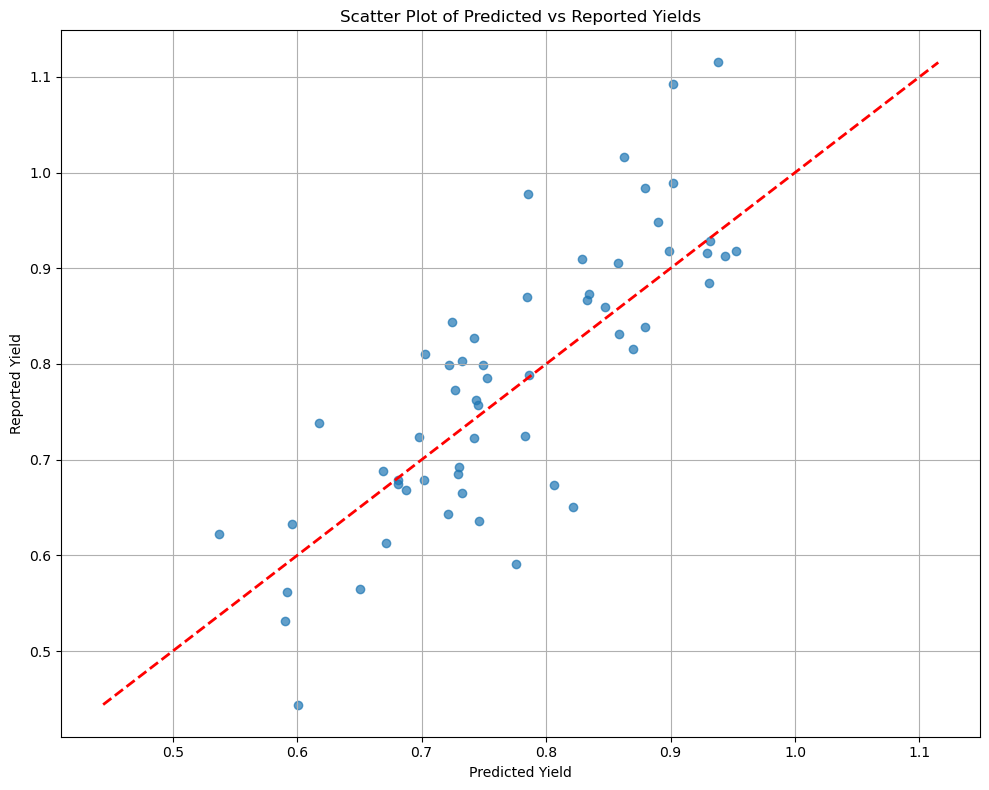

In [109]:
predictions = ridge_cv.predict(X_test)

# the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(predictions, y_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Predicted Yield')
plt.ylabel('Reported Yield')
plt.title('Scatter Plot of Predicted vs Reported Yields')
plt.grid(True)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('products/3.4.pdf', format='pdf')

# Report the final test set score and sample size
print(f'Final Test R^2 score: {test_r2:.4f}')
print(f'Test set sample size: {len(y_test)}')

Most of the points in the scatterplot are fairly well aligned with the reference line, suggesting that the model's predictions are reasonably accurate. The final test set score (R²) is 0.64, based on a test set sample of 57. This indicates that the model explains a substantial part of the variance in the performance data, although some deviations are observed, probably due to inherent variability or limitations of the features used for prediction

In [120]:
import pandoc 